# Log Analytics Agent (LAA)
- **Created by: Andrés Segura Tinoco**
- **Created on: Jun 15, 2020**
- **Data: web scraper log file**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

In [2]:
# Import plot libraries
import matplotlib.pyplot as plt

## 1. Read Log Data

In [3]:
# Read log file records
log_file = '../code/log/log_file.log'
log_data = []

with open(log_file) as fp:
    line = fp.readline()
    while line:
        log_data.append(line)
        line = fp.readline()

print('log n rows:', len(log_data))

log n rows: 11856


In [4]:
# List of patterns in the log file
patterns = {
    'START': 'INFO:root:>> START PROGRAM:',
    'END': 'INFO:root:>> END PROGRAM:',
    'ERROR': 'ERROR:root:',
    'READ_DATA1': 'INFO:root: - Saved data:',
    'READ_DATA2': 'INFO:root: - Data stored in the database:'
}

In [5]:
# Count the number of entries per day
date_data = Counter()
weekdays_data = Counter()
days_data = Counter()
hours_data = Counter()
last_date = ''

for row in log_data:
    if row.startswith(patterns['START']):
        last_date = row.replace(patterns['START'], '').strip()
        
    elif row.startswith(patterns['END']):
        last_date = ''
    
    elif last_date != '':
        if row.startswith(patterns['ERROR']):
            last_date = ''
        
        elif row.startswith(patterns['READ_DATA1']) or row.startswith(patterns['READ_DATA2']):
            date = last_date.split(' ')[0]
            updates = int(row.replace(patterns['READ_DATA1'], '').replace(patterns['READ_DATA2'], '').strip())
            datetime_obj = datetime.strptime(last_date, '%Y-%m-%d %H:%M:%S.%f')
            
            # Save data
            date_data[date] += 1
            weekdays_data[datetime_obj.weekday()] += 1
            days_data[datetime_obj.weekday()] += updates
            hours_data[datetime_obj.hour] += updates

print('n dates with data:', len(date_data))
print('n weekdays with data:', len(weekdays_data))
print('n days with data:', len(days_data))
print('n hours with data:', len(hours_data))

n dates with data: 68
n weekdays with data: 7
n days with data: 7
n hours with data: 24


In [6]:
def plot_col_chart(df, figsize, x_var, y_var, title, color='green', legend=None, x_label=None):
    fig, ax = plt.subplots()
    df.plot.bar(ax=ax, x=x_var, y=y_var, color=color, alpha=0.75, figsize=figsize)
    if legend:
        ax.legend(legend)
    else:
        ax.get_legend().remove()
    if x_label:
        x = np.arange(len(x_label))
        plt.xticks(x, x_label, rotation=45)
    else:
        plt.xticks(rotation=45)
    plt.title(title, fontsize=16)
    plt.xlabel(x_var.capitalize())
    plt.ylabel(y_var.capitalize())
    plt.show()

## 2. Plot Log Data

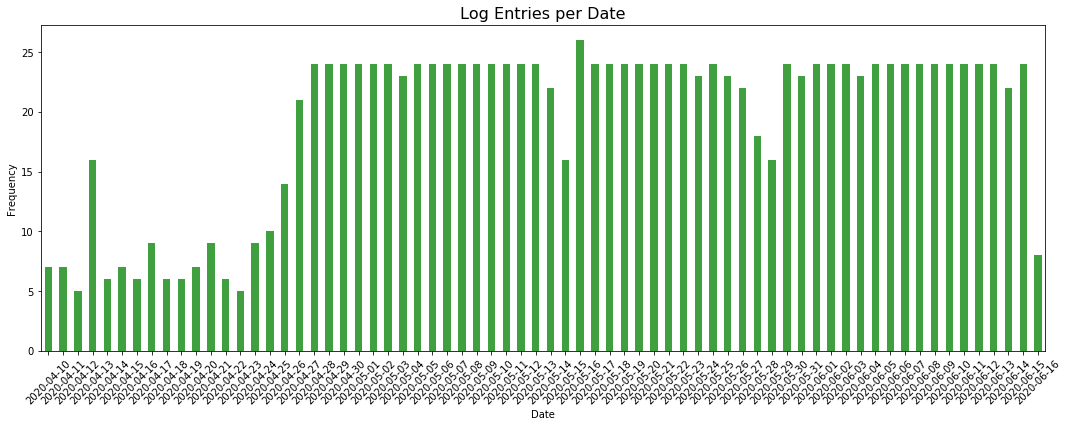

In [7]:
# Plot entries per date
df = pd.DataFrame.from_records(date_data.most_common(), columns = ['date', 'frequency']).sort_values(by=['date'])
figsize = (18, 6)
x_var = 'date'
y_var = 'frequency'
title = 'Log Entries per Date'
plot_col_chart(df, figsize, x_var, y_var, title)

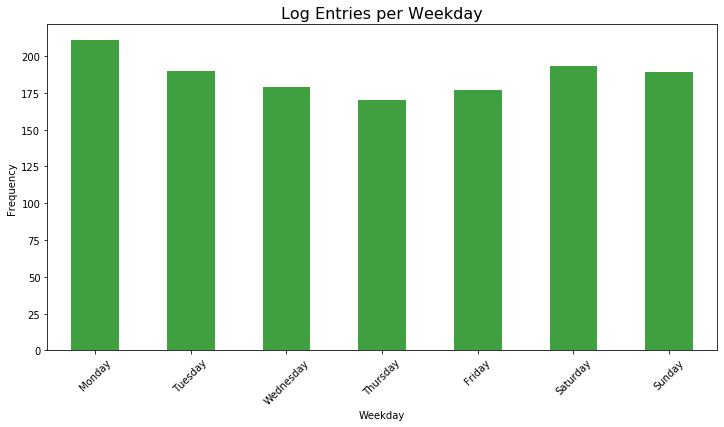

In [8]:
# Plot entries per date
df = pd.DataFrame.from_records(weekdays_data.most_common(), columns = ['weekday', 'frequency']).sort_values(by=['weekday'])
figsize = (12, 6)
x_var = 'weekday'
y_var = 'frequency'
title = 'Log Entries per Weekday'
color = 'green'
x_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_col_chart(df, figsize, x_var, y_var, title, color, None, x_label)

<hr>

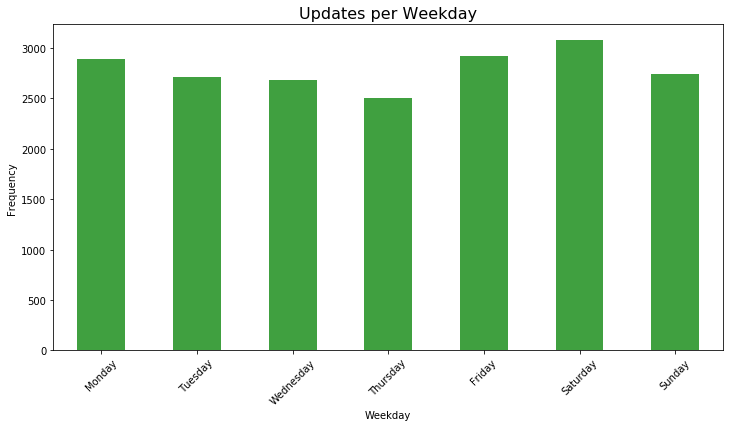

In [9]:
# Plot entries per date
df = pd.DataFrame.from_records(days_data.most_common(), columns = ['weekday', 'frequency']).sort_values(by=['weekday'])
figsize = (12, 6)
x_var = 'weekday'
y_var = 'frequency'
title = 'Updates per Weekday'
color = 'green'
x_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_col_chart(df, figsize, x_var, y_var, title, color, None, x_label)

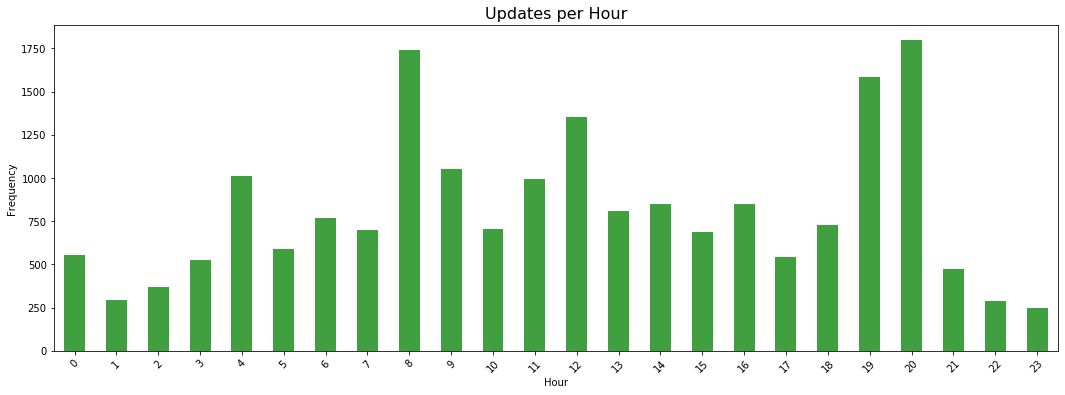

In [10]:
# Plot entries per date
df = pd.DataFrame.from_records(hours_data.most_common(), columns = ['hour', 'frequency']).sort_values(by=['hour'])
figsize = (18, 6)
x_var = 'hour'
y_var = 'frequency'
title = 'Updates per Hour'
plot_col_chart(df, figsize, x_var, y_var, title)

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>